<a href="https://colab.research.google.com/github/jurohd/CSCI-6962-Projects-In-Machine-Learning/blob/main/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow.keras as keras
import numpy as np
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.layers import *

### Part 1 (20 points): This step involves downloading, preparing, and visualizing your dataset. Create a convolutional base using a common pattern: a stack of Conv and MaxPooling layers. Depending on the problem and the dataset you must decide what pattern you want to use (i.e., how many Conv layers and how many pooling layers). Please describe why you chose a particular pattern. Add the final dense layer(s). Compile and train the model. Report the final evaluation and describe the metrics.

metrics using here is just the accuracy of classificaiton. For simple RNN I am using 2 stacks of Conv and MaxPooling layers. plus two dense layer at the end.



(60000, 48, 48, 1)


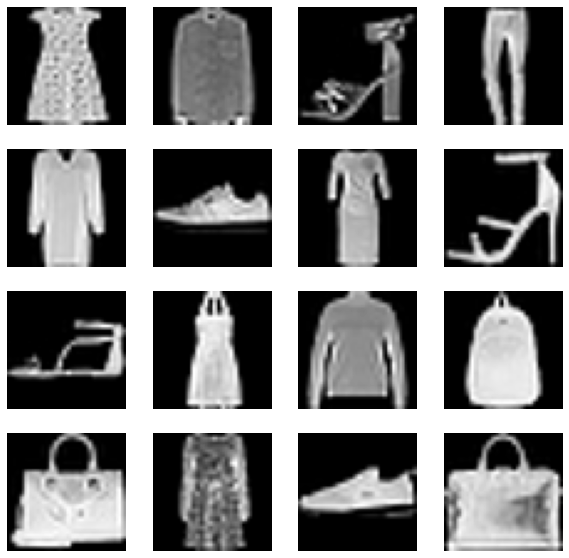

In [48]:
from keras.preprocessing.image import img_to_array, array_to_img

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()



# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

train_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train])
test_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test])
print(train_X.shape)

x_train, x_test = train_X / 255.0, test_X / 255.0


num_train = 60000
num_dev = 128
# This set is used for augmentation.
mask = np.random.choice(num_train, num_dev, replace=False)
X_dev = x_train[mask]
y_dev = y_train[mask]

# Visualization 

fig = plt.figure(figsize=(10,10))

for i in range(16):
    ax = fig.add_subplot(4,4,i+1)
    ax.imshow(X_dev[i,:].reshape(48,48), 'gray')
    ax.axis('off')

In [49]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_images=np.reshape(train_images, (-1,28,28,1))
test_images=np.reshape(test_images, (-1,28,28,1))
train_images = Concatenate()([train_images,train_images,train_images])
test_images = Concatenate()([test_images,test_images,test_images])
# print(train_images.shape)

resized_train_images = tf.image.resize(train_images, (32,32))
resized_test_images = tf.image.resize(test_images, (32,32))
resized_train_images.shape, train_images.shape


from keras.preprocessing.image import img_to_array
train_X = np.asarray([img_to_array(im) for im in resized_train_images])
test_X = np.asarray([img_to_array(im) for im in resized_test_images])

from sklearn.model_selection import train_test_split
#train val split
x_train,x_val,y_train,y_val = train_test_split(train_X,train_labels,test_size=0.2,random_state=13 )


In [22]:
def CNN():
   
    original_dim = (32, 32, 3)
    target_size = (150, 150)

    model = models.Sequential()
    model.add(layers.Input(original_dim))
    model.add(layers.Lambda(lambda image: tf.image.resize(image, target_size)))
    model.add(Conv2D(filters=20, kernel_size=(5, 5), strides=(1,1), activation='relu', input_shape=original_dim, padding="same"))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    model.add(Conv2D(filters=50, kernel_size=(5, 5), strides=(1,1), activation='relu', input_shape=original_dim, padding="same"))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model



In [26]:
model_cnn = CNN()
model_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model_cnn.fit(x=x_train, 
          y=y_train,
          batch_size=128,
          epochs=10, 
          validation_data=(x_val, y_val) 
          )

Epoch 1/10
375/375 [==============================] - 16s 42ms/step - loss: 1.6633 - accuracy: 0.8397 - val_loss: 0.3300 - val_accuracy: 0.8808
Epoch 2/10
375/375 [==============================] - 16s 41ms/step - loss: 0.2869 - accuracy: 0.8940 - val_loss: 0.3079 - val_accuracy: 0.8914
Epoch 3/10
375/375 [==============================] - 16s 41ms/step - loss: 0.2345 - accuracy: 0.9140 - val_loss: 0.3065 - val_accuracy: 0.8932
Epoch 4/10
375/375 [==============================] - 15s 41ms/step - loss: 0.1889 - accuracy: 0.9290 - val_loss: 0.3272 - val_accuracy: 0.8958
Epoch 5/10
375/375 [==============================] - 16s 41ms/step - loss: 0.1552 - accuracy: 0.9428 - val_loss: 0.3315 - val_accuracy: 0.8965
Epoch 6/10
375/375 [==============================] - 15s 41ms/step - loss: 0.1319 - accuracy: 0.9511 - val_loss: 0.3251 - val_accuracy: 0.9012
Epoch 7/10
375/375 [==============================] - 15s 41ms/step - loss: 0.1108 - accuracy: 0.9583 - val_loss: 0.3312 - val_accuracy:

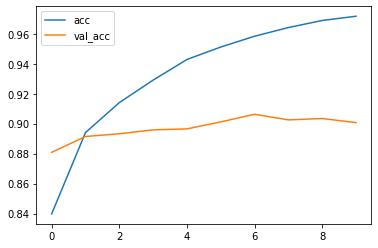

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()

In [4]:
#preparation for data augmentation
train_generator = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

test_generator = ImageDataGenerator(
    rescale=1./255
)

In [5]:
train_generator.fit(x_train)
test_generator.fit(x_val)

train_generator = train_generator.flow(x_train,y_train,batch_size=200)
test_generator = test_generator.flow(x_val,y_val,batch_size=200)

### Part 2 (25 points): The following models are widely used for transfer learning because of their performance and architectural innovations:
1. VGG (e.g., VGG16 or VGG19).

In [6]:
conv_base = tf.keras.applications.VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [7]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block3_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [31]:
from keras import models
from keras import layers


original_dim = (32, 32, 3)
target_size = (150, 150)


model = models.Sequential()
model.add(layers.Input(original_dim))
model.add(layers.Lambda(lambda image: tf.image.resize(image, target_size)))
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [32]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_4 (Lambda)            (None, 150, 150, 3)       0         
_________________________________________________________________
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_18 (Dense)             (None, 10)               

In [33]:

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(1e-4),
              metrics=['acc'])

history = model.fit(x=x_train,y=y_train,
                    epochs=10,
                    validation_data=(x_val,y_val),
                    shuffle=True)

Epoch 1/10
1500/1500 [==============================] - 120s 79ms/step - loss: 210.9592 - acc: 0.6969 - val_loss: 0.5311 - val_acc: 0.8403
Epoch 2/10
1500/1500 [==============================] - 118s 79ms/step - loss: 0.6067 - acc: 0.8191 - val_loss: 0.7833 - val_acc: 0.7937
Epoch 3/10
1500/1500 [==============================] - 118s 79ms/step - loss: 0.5145 - acc: 0.8402 - val_loss: 0.5631 - val_acc: 0.8297
Epoch 4/10
1500/1500 [==============================] - 118s 79ms/step - loss: 0.5164 - acc: 0.8454 - val_loss: 0.3918 - val_acc: 0.8608
Epoch 5/10
1500/1500 [==============================] - 118s 79ms/step - loss: 0.6120 - acc: 0.8474 - val_loss: 0.3885 - val_acc: 0.8683
Epoch 6/10
1500/1500 [==============================] - 118s 79ms/step - loss: 0.5277 - acc: 0.8519 - val_loss: 0.4390 - val_acc: 0.8638
Epoch 7/10
1500/1500 [==============================] - 118s 79ms/step - loss: 0.5471 - acc: 0.8441 - val_loss: 0.3508 - val_acc: 0.8823
Epoch 8/10
1500/1500 [=================

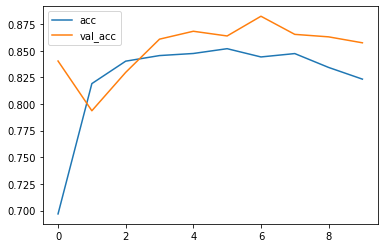

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'],label='val_acc')
plt.legend()

### Part 3 (25 points): Use data augmentation to increase the diversity of your dataset by applying random transformations such as image rotation (you can use any other technique as well). Repeat the process from part 1 with this augmented data. Did you observe any difference in results?

Answer: It increase both the Training/Validation Accuracy during the training process.

In [12]:

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(1e-4),
              metrics=['acc'])

history = model.fit(train_generator,
                    epochs=10,
                    validation_data=test_generator,
                    shuffle=True)

Epoch 1/10
240/240 [==============================] - 110s 414ms/step - loss: 1.2225 - acc: 0.5492 - val_loss: 0.3925 - val_acc: 0.8636
Epoch 2/10
240/240 [==============================] - 99s 413ms/step - loss: 0.7251 - acc: 0.7418 - val_loss: 0.3235 - val_acc: 0.8853
Epoch 3/10
240/240 [==============================] - 99s 413ms/step - loss: 0.5921 - acc: 0.7879 - val_loss: 0.3518 - val_acc: 0.8746
Epoch 4/10
240/240 [==============================] - 99s 413ms/step - loss: 0.5285 - acc: 0.8114 - val_loss: 0.3271 - val_acc: 0.8838
Epoch 5/10
240/240 [==============================] - 99s 413ms/step - loss: 0.4784 - acc: 0.8288 - val_loss: 0.2842 - val_acc: 0.8947
Epoch 6/10
240/240 [==============================] - 99s 413ms/step - loss: 0.4569 - acc: 0.8396 - val_loss: 0.3815 - val_acc: 0.8670
Epoch 7/10
240/240 [==============================] - 99s 413ms/step - loss: 0.4298 - acc: 0.8462 - val_loss: 0.2894 - val_acc: 0.8951
Epoch 8/10
240/240 [==============================] - 

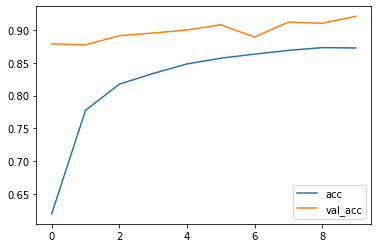

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'],label='val_acc')
plt.legend()

In [1]:
### install necessary packages if in colab
def run_subprocess_command(cmd):
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    for line in process.stdout:
        print(line.decode().strip())


import sys, subprocess

IN_COLAB = "google.colab" in sys.modules
colab_requirements = [
    "pip install tf-nightly-gpu-2.0-preview==2.0.0.dev20190513",
    "pip install tfp-nightly==0.7.0.dev20190508",
]
if IN_COLAB:
    for i in colab_requirements:
        run_subprocess_command(i)

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
%matplotlib inline
from IPython import display
import pandas as pd

# the nightly build of tensorflow_probability is required as of the time of writing this 
import tensorflow_probability as tfp
tf.compat.v1.enable_eager_execution()
ds = tfp.distributions



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  after removing the cwd from sys.path.


## Task 2 (30 points):
### Part 1 (15 points): Variational Autoencoder (VAE): Here is a complete implementation of a VAE in TensorFlow: https://www.tensorflow.org/tutorials/generative/cvae

In [3]:
TRAIN_BUF=60000
BATCH_SIZE=512
TEST_BUF=10000
DIMS = (28,28,1)
N_TRAIN_BATCHES =int(TRAIN_BUF/BATCH_SIZE)
N_TEST_BATCHES = int(TEST_BUF/BATCH_SIZE)

In [4]:
# load dataset
(train_images, _), (test_images, _) = tf.keras.datasets.fashion_mnist.load_data()

# split dataset
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype("float32") / 255.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype("float32") / 255.0

# batch datasets
train_dataset = (
    tf.data.Dataset.from_tensor_slices(train_images)
    .shuffle(TRAIN_BUF)
    .batch(BATCH_SIZE)
)
test_dataset = (
    tf.data.Dataset.from_tensor_slices(test_images)
    .shuffle(TEST_BUF)
    .batch(BATCH_SIZE)
)

In [5]:
class VAE(tf.keras.Model):
    """a basic vae class for tensorflow
    Extends:
        tf.keras.Model
    """

    def __init__(self, **kwargs):
        super(VAE, self).__init__()
        self.__dict__.update(kwargs)

        self.enc = tf.keras.Sequential(self.enc)
        self.dec = tf.keras.Sequential(self.dec)

    def encode(self, x):
        mu, sigma = tf.split(self.enc(x), num_or_size_splits=2, axis=1)
        return ds.MultivariateNormalDiag(loc=mu, scale_diag=sigma)

    def reparameterize(self, mean, logvar):
        eps = tf.random.normal(shape=mean.shape)
        return eps * tf.exp(logvar * 0.5) + mean

    def reconstruct(self, x):
        mu, _ = tf.split(self.enc(x), num_or_size_splits=2, axis=1)
        return self.decode(mu)

    def decode(self, z):
        return self.dec(z)

    def compute_loss(self, x):

        q_z = self.encode(x)
        z = q_z.sample()
        x_recon = self.decode(z)
        p_z = ds.MultivariateNormalDiag(
          loc=[0.] * z.shape[-1], scale_diag=[1.] * z.shape[-1]
          )
        kl_div = ds.kl_divergence(q_z, p_z)
        latent_loss = tf.reduce_mean(tf.maximum(kl_div, 0))
        recon_loss = tf.reduce_mean(tf.reduce_sum(tf.math.square(x - x_recon), axis=0))

        return recon_loss, latent_loss

    def compute_gradients(self, x):
        with tf.GradientTape() as tape:
            loss = self.compute_loss(x)
        return tape.gradient(loss, self.trainable_variables)

    @tf.function
    def train(self, train_x):
        gradients = self.compute_gradients(train_x)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))

In [6]:
N_Z = 2
encoder = [
    tf.keras.layers.InputLayer(input_shape=DIMS),
    tf.keras.layers.Conv2D(
        filters=32, kernel_size=3, strides=(2, 2), activation="relu"
    ),
    tf.keras.layers.Conv2D(
        filters=64, kernel_size=3, strides=(2, 2), activation="relu"
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=N_Z*2),
]

decoder = [
    tf.keras.layers.Dense(units=7 * 7 * 64, activation="relu"),
    tf.keras.layers.Reshape(target_shape=(7, 7, 64)),
    tf.keras.layers.Conv2DTranspose(
        filters=64, kernel_size=3, strides=(2, 2), padding="SAME", activation="relu"
    ),
    tf.keras.layers.Conv2DTranspose(
        filters=32, kernel_size=3, strides=(2, 2), padding="SAME", activation="relu"
    ),
    tf.keras.layers.Conv2DTranspose(
        filters=1, kernel_size=3, strides=(1, 1), padding="SAME", activation="sigmoid"
    ),
]

In [7]:
# the optimizer for the model
optimizer = tf.keras.optimizers.Adam(1e-3)
# train the model
model = VAE(
    enc = encoder,
    dec = decoder,
    optimizer = optimizer,
)

In [8]:
# exampled data for plotting results
example_data = next(iter(test_dataset))


def plot_reconstruction(model, example_data, nex=8, zm=2):

    example_data_reconstructed = model.reconstruct(example_data)
    samples = model.decode(tf.random.normal(shape=(BATCH_SIZE, N_Z)))
    fig, axs = plt.subplots(ncols=nex, nrows=3, figsize=(zm * nex, zm * 3))
    for axi, (dat, lab) in enumerate(
        zip(
            [example_data, example_data_reconstructed, samples],
            ["data", "data recon", "samples"],
        )
    ):
        for ex in range(nex):
            axs[axi, ex].matshow(
                dat.numpy()[ex].squeeze(), cmap=plt.cm.Greys, vmin=0, vmax=1
            )
            axs[axi, ex].axes.get_xaxis().set_ticks([])
            axs[axi, ex].axes.get_yaxis().set_ticks([])
        axs[axi, 0].set_ylabel(lab)

    plt.show()

In [9]:
# a pandas dataframe to save the loss information to
losses = pd.DataFrame(columns = ['recon_loss', 'latent_loss'])

Epoch: 49 | recon_loss: 26.976364135742188 | latent_loss: 4.5653157234191895


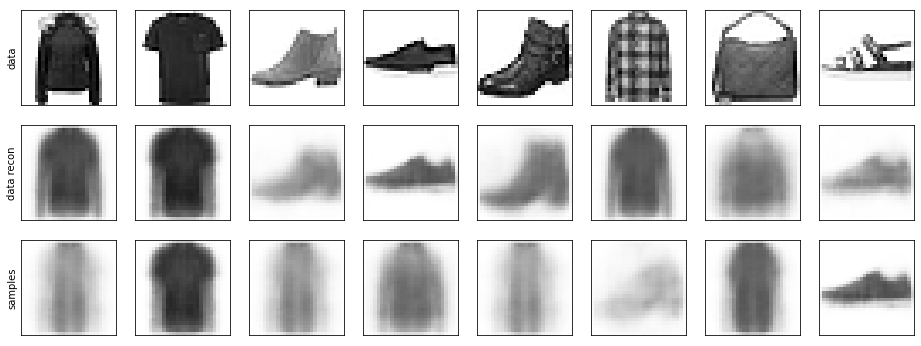

In [10]:
n_epochs = 50
for epoch in range(n_epochs):
    # train
    for batch, train_x in tqdm( zip(range(N_TRAIN_BATCHES), train_dataset), total=N_TRAIN_BATCHES):
      model.train(train_x)
    # test on holdout
    loss = []
    for batch, test_x in tqdm(zip(range(N_TEST_BATCHES), test_dataset), total=N_TEST_BATCHES):
      loss.append(model.compute_loss(train_x))
    losses.loc[len(losses)] = np.mean(loss, axis=0)
    # plot results
    display.clear_output()
    print( "Epoch: {} | recon_loss: {} | latent_loss: {}".format(epoch, losses.recon_loss.values[-1], losses.latent_loss.values[-1]))
    plot_reconstruction(model, example_data)

### Part 2 (15 points): Generative Adversarial Networks (GANs): Repeat part 1 (use same dataset) and implement a GAN model to generate high quality synthetic images. You may follow steps outlined here: https://www.tensorflow.org/tutorials/generative/dcgan


In [11]:
class GAN(tf.keras.Model):
    """ a basic GAN class 
    Extends:
        tf.keras.Model
    """

    def __init__(self, **kwargs):
        super(GAN, self).__init__()
        self.__dict__.update(kwargs)

        self.gen = tf.keras.Sequential(self.gen)
        self.disc = tf.keras.Sequential(self.disc)

    def generate(self, z):
        return self.gen(z)

    def discriminate(self, x):
        return self.disc(x)

    def compute_loss(self, x):
        """ passes through the network and computes loss
        """
        # generating noise from a uniform distribution
        z_samp = tf.random.normal([x.shape[0], 1, 1, self.n_Z])

        # run noise through generator
        x_gen = self.generate(z_samp)
        # discriminate x and x_gen
        logits_x = self.discriminate(x)
        logits_x_gen = self.discriminate(x_gen)
        ### losses
        # losses of real with label "1"
        disc_real_loss = gan_loss(logits=logits_x, is_real=True)
        # losses of fake with label "0"
        disc_fake_loss = gan_loss(logits=logits_x_gen, is_real=False)
        disc_loss = disc_fake_loss + disc_real_loss

        # losses of fake with label "1"
        gen_loss = gan_loss(logits=logits_x_gen, is_real=True)

        return disc_loss, gen_loss

    def compute_gradients(self, x):
        """ passes through the network and computes loss
        """
        ### pass through network
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            disc_loss, gen_loss = self.compute_loss(x)

        # compute gradients
        gen_gradients = gen_tape.gradient(gen_loss, self.gen.trainable_variables)
        disc_gradients = disc_tape.gradient(disc_loss, self.disc.trainable_variables)

        return gen_gradients, disc_gradients

    def apply_gradients(self, gen_gradients, disc_gradients):

        self.gen_optimizer.apply_gradients(
            zip(gen_gradients, self.gen.trainable_variables)
        )
        self.disc_optimizer.apply_gradients(
            zip(disc_gradients, self.disc.trainable_variables)
        )
    @tf.function
    def train(self, train_x):
        gen_gradients, disc_gradients = self.compute_gradients(train_x)
        self.apply_gradients(gen_gradients, disc_gradients)
        
        
def gan_loss(logits, is_real=True):
    """Computes standard gan loss between logits and labels
    """
    if is_real:
        labels = tf.ones_like(logits)
    else:
        labels = tf.zeros_like(logits)

    return tf.compat.v1.losses.sigmoid_cross_entropy(
        multi_class_labels=labels, logits=logits
    )

In [12]:
N_Z = 64
generator = [
    tf.keras.layers.Dense(units=7 * 7 * 64, activation="relu"),
    tf.keras.layers.Reshape(target_shape=(7, 7, 64)),
    tf.keras.layers.Conv2DTranspose(
        filters=64, kernel_size=3, strides=(2, 2), padding="SAME", activation="relu"
    ),
    tf.keras.layers.Conv2DTranspose(
        filters=32, kernel_size=3, strides=(2, 2), padding="SAME", activation="relu"
    ),
    tf.keras.layers.Conv2DTranspose(
        filters=1, kernel_size=3, strides=(1, 1), padding="SAME", activation="sigmoid"
    ),
]

discriminator = [
    tf.keras.layers.InputLayer(input_shape=DIMS),
    tf.keras.layers.Conv2D(
        filters=32, kernel_size=3, strides=(2, 2), activation="relu"
    ),
    tf.keras.layers.Conv2D(
        filters=64, kernel_size=3, strides=(2, 2), activation="relu"
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1, activation=None),
]

In [13]:
# optimizers
gen_optimizer = tf.keras.optimizers.Adam(0.001, beta_1=0.5)
disc_optimizer = tf.keras.optimizers.RMSprop(0.005)# train the model
# model
model = GAN(
    gen = generator,
    disc = discriminator,
    gen_optimizer = gen_optimizer,
    disc_optimizer = disc_optimizer,
    n_Z = N_Z
)

In [14]:
# exampled data for plotting results
def plot_reconstruction(model, nex=8, zm=2):
    samples = model.generate(tf.random.normal(shape=(BATCH_SIZE, N_Z)))
    fig, axs = plt.subplots(ncols=nex, nrows=1, figsize=(zm * nex, zm))
    for axi in range(nex):
        axs[axi].matshow(
                    samples.numpy()[axi].squeeze(), cmap=plt.cm.Greys, vmin=0, vmax=1
                )
        axs[axi].axis('off')
    plt.show()

In [15]:
losses = pd.DataFrame(columns = ['disc_loss', 'gen_loss'])


Epoch: 49 | disc_loss: 0.741773247718811 | gen_loss: 1.4413130283355713


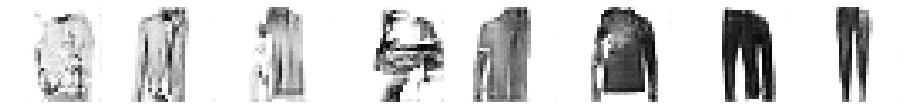

In [16]:
n_epochs = 50
for epoch in range(n_epochs):
    # train
    for batch, train_x in tqdm(
        zip(range(N_TRAIN_BATCHES), train_dataset), total=N_TRAIN_BATCHES
    ):
        model.train(train_x)
    # test on holdout
    loss = []
    for batch, test_x in tqdm(
        zip(range(N_TEST_BATCHES), test_dataset), total=N_TEST_BATCHES
    ):
        loss.append(model.compute_loss(train_x))
    losses.loc[len(losses)] = np.mean(loss, axis=0)
    # plot results
    display.clear_output()
    print(
        "Epoch: {} | disc_loss: {} | gen_loss: {}".format(
            epoch, losses.disc_loss.values[-1], losses.gen_loss.values[-1]
        )
    )
    plot_reconstruction(model)